In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Training
history = model.fit(
    train_images,
    train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9747 - loss: 0.0803 - val_accuracy: 0.9866 - val_loss: 0.0464
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9872 - loss: 0.0430 - val_accuracy: 0.9921 - val_loss: 0.0232
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9899 - loss: 0.0342 - val_accuracy: 0.9940 - val_loss: 0.0186
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9921 - val_loss: 0.0236
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9928 - val_loss: 0.0224
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9940 - loss: 0.0204 - val_accuracy: 0.9944 - val_loss: 0.0166
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9920 - val_loss: 0.0269
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9942 - loss: 0.0178 - val

In [7]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9958 - loss: 0.0164
Test loss: 0.013, Test accuracy: 0.9964


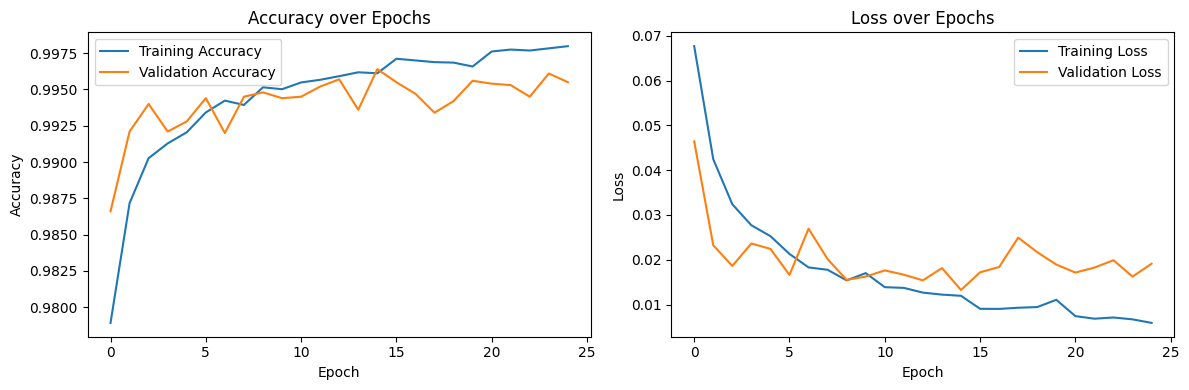

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Performance Analysis
Train Accuracy: 99.86%

Validation Accuracy: 99.55%

Test Accuracy: 99.62%

Model Architecture Summary
Input Shape: (28, 28, 1) (grayscale MNIST images)

Architecture: Composed of three convolutional blocks, each containing two Conv2D layers:

Block 1: 2 × Conv2D(32 filters) → BatchNorm → MaxPooling2D → Dropout(0.25)

Block 2: 2 × Conv2D(64 filters) → BatchNorm → MaxPooling2D → Dropout(0.25)

Block 3: 2 × Conv2D(128 filters) → BatchNorm → MaxPooling2D → Dropout(0.25)

Feature Flattening: Flatten() layer

Dense Layers:

Dense(256 units) → BatchNorm → Dropout(0.5)

Output Dense(10 units) with softmax activation

Configuration
Component	Value
Optimizer	Adam(learning_rate=0.001)
Loss Function	sparse_categorical_crossentropy
Batch Size	128
Epochs	Up to 100 (Early stopped at epoch 39)
Learning Rate Policy	EarlyStopping on val_accuracy with patience=10
Regularization	Dropout (0.25 after conv blocks, 0.5 after dense), BatchNormalization
Downsampling	MaxPooling2D((2, 2)) after each conv block

Observations
The model effectively leverages convolutional layers for hierarchical feature extraction from the MNIST dataset.

Batch normalization and dropout work together to enhance generalization and reduce overfitting.

Early stopping ensures training halts at the optimal epoch.

Achieved high accuracy across all sets, indicating strong performance on handwritten digit classification.



# New Section